In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e11/sample_submission.csv
/kaggle/input/playground-series-s4e11/train.csv
/kaggle/input/playground-series-s4e11/test.csv


# Loading the data

In [4]:
data = pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')
data

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


In [5]:
output = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')
output

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,Zoya,Female,49.0,Jaipur,Working Professional,Pilot,NaN,3.0,NaN,NaN,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes
93796,234496,Shlok,Male,29.0,Ahmedabad,Working Professional,Pilot,NaN,5.0,NaN,NaN,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes
93797,234497,Rishi,Male,24.0,Visakhapatnam,Student,NaN,1.0,NaN,7.51,4.0,NaN,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No
93798,234498,Eshita,Female,23.0,Kalyan,Working Professional,Marketing Manager,NaN,4.0,NaN,NaN,2.0,5-6 hours,Healthy,BA,Yes,7.0,5.0,Yes


# Data Processing

## Removing unneccessary columns and exploring data

In [6]:
data = data.drop(['id','Name'], axis = 1)
output = output.drop(['id','Name'], axis = 1)

In [7]:
data.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [8]:
data.isnull().any()

Gender                                   False
Age                                      False
City                                     False
Working Professional or Student          False
Profession                                True
Academic Pressure                         True
Work Pressure                             True
CGPA                                      True
Study Satisfaction                        True
Job Satisfaction                          True
Sleep Duration                           False
Dietary Habits                            True
Degree                                    True
Have you ever had suicidal thoughts ?    False
Work/Study Hours                         False
Financial Stress                          True
Family History of Mental Illness         False
Depression                               False
dtype: bool

## Imputing NANs

In [9]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

numeric_imputer = SimpleImputer(strategy = 'mean')
categorical_imputer = SimpleImputer(strategy = 'most_frequent')
def fill_nan(df):
    numerical_columns = df.select_dtypes(include=['number']).columns
    categorical_columns = df.select_dtypes(include = ['object']).columns
    
    df[numerical_columns] = numeric_imputer.fit_transform(df[numerical_columns])
    df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])
    return df
data = fill_nan(data)
output = fill_nan(output)


In [10]:
data.isnull().any()
output.isnull().any()

Gender                                   False
Age                                      False
City                                     False
Working Professional or Student          False
Profession                               False
Academic Pressure                        False
Work Pressure                            False
CGPA                                     False
Study Satisfaction                       False
Job Satisfaction                         False
Sleep Duration                           False
Dietary Habits                           False
Degree                                   False
Have you ever had suicidal thoughts ?    False
Work/Study Hours                         False
Financial Stress                         False
Family History of Mental Illness         False
dtype: bool

## Encoding categorical features to numbers

In [11]:
def encoding(df):
    categorical_columns = df.select_dtypes(include = ['object']).columns
    encoder = OrdinalEncoder()
    df[categorical_columns] = encoder.fit_transform(df[categorical_columns])
    return df
data = encoding(data)
output = encoding(output)
data,output

(        Gender   Age  City  Working Professional or Student  Profession  \
 0          0.0  49.0  50.0                              1.0        10.0   
 1          1.0  26.0  93.0                              1.0        55.0   
 2          1.0  33.0  97.0                              0.0        55.0   
 3          1.0  22.0  64.0                              1.0        55.0   
 4          0.0  30.0  37.0                              1.0         9.0   
 ...        ...   ...   ...                              ...         ...   
 140695     0.0  18.0   4.0                              1.0        55.0   
 140696     0.0  41.0  26.0                              1.0        15.0   
 140697     0.0  24.0  44.0                              1.0        38.0   
 140698     0.0  49.0  84.0                              1.0        47.0   
 140699     1.0  27.0  72.0                              0.0        55.0   
 
         Academic Pressure  Work Pressure      CGPA  Study Satisfaction  \
 0         

In [12]:
data.describe()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000
mean,0.550561,40.388621,52.158003,0.801699,38.513710,3.142273,2.998998,7.658636,2.944940,2.974404,22.614606,14.098280,49.851663,0.494399,6.252679,2.988983,0.497100,0.181713
std,0.497439,12.384099,29.953424,0.398722,18.614608,0.614679,1.258598,0.652098,0.605658,1.267871,5.617567,5.268936,27.034487,0.499970,3.853615,1.413613,0.499993,0.385609
min,0.000000,18.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,29.000000,26.000000,1.000000,20.000000,3.142273,2.000000,7.658636,2.944940,2.000000,19.000000,7.000000,24.000000,0.000000,3.000000,2.000000,0.000000,0.000000
50%,1.000000,42.000000,50.000000,1.000000,51.000000,3.142273,2.998998,7.658636,2.944940,2.974404,27.000000,15.000000,45.000000,0.000000,6.000000,3.000000,0.000000,0.000000
75%,1.000000,51.000000,78.000000,1.000000,55.000000,3.142273,4.000000,7.658636,2.944940,4.000000,27.000000,20.000000,78.000000,1.000000,10.000000,4.000000,1.000000,0.000000
max,1.000000,60.000000,97.000000,1.000000,63.000000,5.000000,5.000000,10.000000,5.000000,5.000000,35.000000,22.000000,114.000000,1.000000,12.000000,5.000000,1.000000,1.000000


## Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_features = ['Age', 'City','Profession', 'Academic Pressure','Work Pressure', 'CGPA', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Work/Study Hours']
data[scale_features] = scaler.fit_transform(data[scale_features])
output[scale_features] = scaler.fit_transform(output[scale_features])
data,output

(        Gender       Age      City  Working Professional or Student  \
 0          0.0  0.695360 -0.072046                              1.0   
 1          1.0 -1.161867  1.363522                              1.0   
 2          1.0 -0.596624  1.497063                              0.0   
 3          1.0 -1.484863  0.395348                              1.0   
 4          0.0 -0.838871 -0.506054                              1.0   
 ...        ...       ...       ...                              ...   
 140695     0.0 -1.807859 -1.607769                              1.0   
 140696     0.0  0.049368 -0.873292                              1.0   
 140697     0.0 -1.323365 -0.272357                              1.0   
 140698     0.0  0.695360  1.063054                              1.0   
 140699     1.0 -1.081118  0.662431                              0.0   
 
         Profession  Academic Pressure  Work Pressure          CGPA  \
 0        -1.531798       7.224761e-16       1.589872  2.724076

## Splitting the data for training and validation

In [14]:
from sklearn.model_selection import train_test_split
train_data, val_data = train_test_split(data, test_size = 0.2, random_state = 42)
len(train_data), len(val_data)

(112560, 28140)

In [15]:
Y_train = train_data.loc[:,'Depression']
Y_val = val_data['Depression']
X_train = train_data.drop('Depression', axis = 1)
X_val = val_data.drop('Depression', axis = 1)


In [16]:
Y_train

33707     0.0
133592    0.0
113169    0.0
42896     0.0
82457     0.0
         ... 
110268    0.0
119879    0.0
103694    1.0
131932    1.0
121958    0.0
Name: Depression, Length: 112560, dtype: float64

In [17]:
Y_train

33707     0.0
133592    0.0
113169    0.0
42896     0.0
82457     0.0
         ... 
110268    0.0
119879    0.0
103694    1.0
131932    1.0
121958    0.0
Name: Depression, Length: 112560, dtype: float64

In [18]:
Y_val

18347     0.0
96193     0.0
100005    0.0
39890     0.0
98243     0.0
         ... 
65990     0.0
22536     0.0
107320    1.0
53911     0.0
58666     0.0
Name: Depression, Length: 28140, dtype: float64

In [19]:
X_val

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
18347,0.0,0.856858,0.662431,1.0,0.885667,7.224761e-16,0.000796,2.724076e-15,2.94494,5.000000,1.136687,0.171140,-1.104211,0.0,1.231918,2.0,1.0
96193,0.0,-1.646361,-1.641154,1.0,0.885667,7.224761e-16,-1.588279,2.724076e-15,2.94494,4.000000,0.780660,0.171140,-0.179463,0.0,-1.622555,5.0,1.0
100005,0.0,-1.565612,-1.607769,0.0,0.885667,-1.858332e+00,0.000000,2.474543e-01,5.00000,2.974404,-1.355504,-1.347199,1.078195,1.0,1.491416,2.0,1.0
39890,1.0,-0.354377,-0.839907,1.0,0.885667,7.224761e-16,1.589872,2.724076e-15,2.94494,2.000000,0.780660,0.171140,1.152175,0.0,-1.363057,1.0,0.0
98243,1.0,1.583599,0.395348,1.0,-0.511090,7.224761e-16,-0.793742,2.724076e-15,2.94494,2.000000,-1.355504,0.171140,-0.808291,0.0,-0.065570,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65990,1.0,0.210866,-0.272357,1.0,-0.403647,7.224761e-16,1.589872,2.724076e-15,2.94494,3.000000,1.136687,0.171140,0.486356,0.0,-1.103560,2.0,0.0
22536,1.0,0.453113,-1.106989,1.0,0.455896,7.224761e-16,-0.793742,2.724076e-15,2.94494,1.000000,-0.643449,1.120101,1.263144,0.0,-0.844062,3.0,0.0
107320,0.0,-1.565612,-1.607769,0.0,0.885667,-2.314605e-01,0.000000,3.452508e+00,2.00000,2.974404,0.780660,-1.347199,-1.215180,1.0,-0.065570,1.0,1.0
53911,1.0,-1.646361,0.795972,0.0,0.885667,-3.485204e+00,0.000000,8.915320e-01,5.00000,2.974404,-1.355504,-1.347199,-0.179463,0.0,0.972421,3.0,1.0


In [20]:
X_train

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
33707,1.0,1.179854,-1.374072,1.0,0.885667,7.224761e-16,-1.588279,2.724076e-15,2.94494,5.0,1.136687,1.120101,-1.104211,0.0,-0.584565,2.0,1.0
133592,1.0,1.099105,1.129825,1.0,0.885667,7.224761e-16,1.589872,2.724076e-15,2.94494,4.0,0.780660,-1.347199,0.893245,0.0,1.231918,4.0,1.0
113169,1.0,0.614611,-0.105431,1.0,0.885667,7.224761e-16,0.795334,2.724076e-15,2.94494,3.0,1.136687,0.171140,1.041205,0.0,-0.844062,1.0,1.0
42896,1.0,-1.323365,0.428734,1.0,0.885667,7.224761e-16,-1.588279,2.724076e-15,2.94494,1.0,-0.643449,1.120101,-1.215180,1.0,0.453425,5.0,0.0
82457,1.0,-0.192879,0.195037,1.0,0.885667,7.224761e-16,0.795334,2.724076e-15,2.94494,5.0,-1.355504,0.171140,-0.179463,0.0,-1.622555,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0.0,0.453113,-0.506054,1.0,-2.015290,7.224761e-16,-0.793742,2.724076e-15,2.94494,2.0,0.780660,0.171140,0.893245,1.0,1.231918,2.0,0.0
119879,0.0,0.130117,1.396907,1.0,-0.081319,7.224761e-16,0.795334,2.724076e-15,2.94494,1.0,0.780660,0.171140,1.337124,1.0,-1.103560,1.0,0.0
103694,0.0,-1.727110,-0.072046,1.0,0.885667,7.224761e-16,1.589872,2.724076e-15,2.94494,2.0,-0.643449,0.171140,-0.179463,1.0,0.972421,5.0,1.0
131932,0.0,-1.727110,0.862742,1.0,0.885667,7.224761e-16,1.589872,2.724076e-15,2.94494,5.0,-0.643449,1.120101,-0.179463,0.0,1.491416,3.0,0.0


# LET'S BUILD A SIMPLE NEURAL NETWORK

## Necessary imports

In [21]:
import tensorflow as tf
import keras
import keras_tuner as kt
from keras.models import Sequential
from keras import layers
from keras.layers import Dense

# Hyperparameter tuning

### Building the model

In [40]:
def build_model(hp):
    model = keras.Sequential([
        layers.BatchNormalization(input_shape =[17]),
        layers.Dense(hp.Int('units_layer1', min_value = 128, max_value = 1024, step = 16), activation = 'relu'),
        layers.Dropout(hp.Float('dropout_layer1',min_value = 0.2, max_value = 0.5, step = 0.1)),
        layers.BatchNormalization(),
        layers.Dense(hp.Int('units_layer2', min_value = 64, max_value = 512, step = 16), activation = 'relu'),
        layers.Dropout(hp.Float('dropout_layer2',min_value = 0.2, max_value = 0.5, step = 0.1)),
        layers.BatchNormalization(),
        layers.Dense(hp.Int('units_layer3', min_value = 32, max_value = 256, step = 16), activation = 'relu'),
        layers.Dropout(hp.Float('dropout_layer3',min_value = 0.2, max_value = 0.5, step = 0.1)),
        layers.BatchNormalization(),
        layers.Dense(hp.Int('units_layer4', min_value = 32, max_value = 128, step = 16), activation = 'relu'),
        layers.Dropout(hp.Float('dropout_layer4',min_value = 0.2, max_value = 0.5, step = 0.1)),
        layers.BatchNormalization(),
        layers.Dense(units = 1, activation = 'sigmoid'),
    ])
    model.compile(
        optimizer = 'adam',
        loss = 'binary_crossentropy',
        metrics = ['accuracy']
    )
    return model

### Tuning the model

In [41]:
tuner = kt.GridSearch(
    hypermodel = build_model,
    objective = 'val_loss',
    max_trials = 17,
    overwrite = True
)
tuner.search(X_train, Y_train, validation_data = (X_val, Y_val), epochs = 10, batch_size = 32, verbose = 1)
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
print('Best hyperparameters are', best_hps)

Trial 17 Complete [00h 01m 28s]
val_loss: 0.15448696911334991

Best val_loss So Far: 0.15448696911334991
Total elapsed time: 00h 24m 43s
Best hyperparameters are <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7dbccc4d2710>


## Using the best model on our dataset

In [44]:
best_model = tuner.get_best_models(num_models = 1)[0]
best_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization                  │ (None, 17)                  │              68 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 112)                 │           3,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 112)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 112)                 │             448 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             113 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,861 (69.77 KB)

 Trainable params: 17,155 (67.01 KB)

 Non-trainable params: 706 (2.76 KB)

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.15410, saving model to best_model.keras
3518/3518 - 17s - 5ms/step - accuracy: 0.9330 - loss: 0.1712 - val_accuracy: 0.9371 - val_loss: 0.1541 - learning_rate: 0.0010
Epoch 2/100

Epoch 2: val_loss did not improve from 0.15410
3518/3518 - 7s - 2ms/step - accuracy: 0.9336 - loss: 0.1706 - val_accuracy: 0.9348 - val_loss: 0.1575 - learning_rate: 0.0010
Epoch 3/100

Epoch 3: val_loss did not improve from 0.15410
3518/3518 - 7s - 2ms/step - accuracy: 0.9326 - loss: 0.1712 - val_accuracy: 0.9350 - val_loss: 0.1560 - learning_rate: 0.0010
Epoch 4/100

Epoch 4: val_loss did not improve from 0.15410
3518/3518 - 7s - 2ms/step - accuracy: 0.9330 - loss: 0.1704 - val_accuracy: 0.9365 - val_loss: 0.1553 - learning_rate: 0.0010
Epoch 5/100

Epoch 5: val_loss did not improve from 0.15410
3518/3518 - 7s - 2ms/step - accuracy: 0.9330 - loss: 0.1695 - val_accuracy: 0.9354 - val_loss: 0.1588 - learning_rate: 0.0010
Epoch 6/100

Epoch 6: val_loss did 

<function matplotlib.pyplot.show(close=None, block=None)>

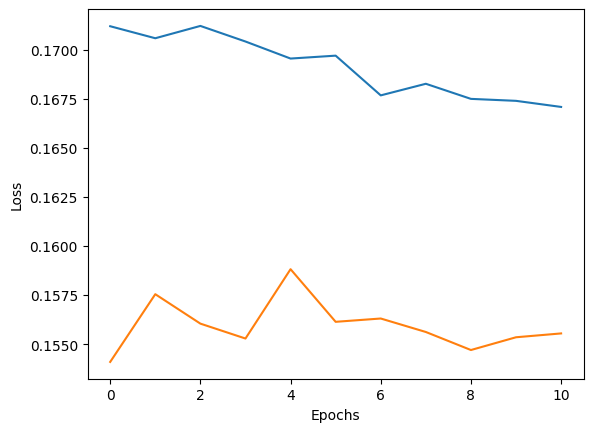

In [45]:
model = best_model

callbacks = [
    keras.callbacks.ModelCheckpoint(filepath='best_model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose = 1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, mode='min')
]

history = model.fit(
    X_train, Y_train,
    validation_data = (X_val, Y_val),
    epochs = 100,
    batch_size = 32,
    verbose = 2,
    callbacks = callbacks,
)

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show

## Using the model to predict depression

In [48]:
Y_pred = model.predict(output)
y_pred_binary = (Y_pred >= 0.5).astype(int)
y_pred_binary

2932/2932 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

## Creating Dataframe to export

In [49]:
id_get = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')
submit = pd.DataFrame()
submit['id'] = id_get['id']
submit['Depression'] = y_pred_binary
submit = submit.loc[:, ['id', 'Depression']]
submit

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
...,...,...
93795,234495,0
93796,234496,1
93797,234497,0
93798,234498,1


In [50]:
submit.to_csv('sub1.csv', index = False)